<a href="https://colab.research.google.com/github/AmruthaA27/Task-6---ML---Linear-Regression/blob/main/ML_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline

In [3]:
df = pd.read_csv("car_data.csv")
df.head(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [4]:
#Task 1 - linear regression equation for mileage vs price
x = df[['Mileage']]
y = df[['Price']]

In [5]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)
print('r-squared:', linreg.score(x, y))

intercept: [24764.55900606]
coefficients: [[-0.1725205]]
r-squared: 0.02046344732348926


R2 is 0.02 which is very low so the equation is not a good fit for the data

Text(0.5, 1.0, 'Mileage vs Price')

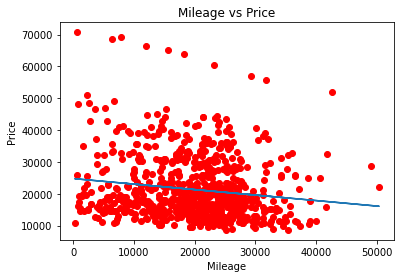

In [6]:
plt.scatter(x, y, color='r')
plt.plot(x, linreg.predict(x))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

In [7]:
#task 2- mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x = df[feature]
y = df[['Price']]

In [8]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)
print('r-squared: ', linreg.score(x, y))

intercept: [6758.7551436]
coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]
r-squared:  0.4462643536728379


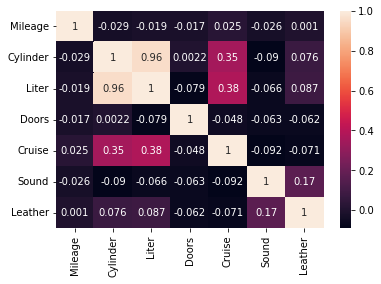

In [10]:
import seaborn as sns
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
cors = df.loc[:, list(feature)].corr()
sns.heatmap(cors, annot=True)
plt.show()

Cylinder,Litre and cruise have higher correlation so potentially making them the most suitable combiantion of predictors

In [18]:
feature1 = ['Cylinder', 'Liter', 'Cruise']
x1 = df[feature1]
y1 = df[['Price']]

linreg1 = linear_model.LinearRegression()
linreg1.fit(x1, y)
print('intercept:', linreg1.intercept_)
print('coefficients:', linreg1.coef_)
print('r-squared: ', linreg1.score(x1, y1))

intercept: [-710.87635252]
coefficients: [[3141.3822293   334.52700575 5963.01174382]]
r-squared:  0.3840622008524506


R2 value is close to the R2 value obtained when 6 elements were considered as predictors, so it can be inferred that Cylinder,Litre and Cruise contibuted most to the success of the predictor model.